Data Collection and Preprocessing in the Power/Energy Sector

    1. Session Objectives
        •	Understand the importance of data preprocessing in the Power/Energy sector.
        •	Learn techniques for handling missing data.
        •	Perform feature engineering and selection using Python libraries like pandas, scikit-learn, and numpy.
        

2. Dataset Preparation

        Dataset: Simulated or real-world data from the Power/Energy sector.

        Example columns:
        
            •	Date: Timestamp of data recording.
            •	Energy_Consumed: Total energy consumed in kWh.
            •	Temperature: Ambient temperature in degrees Celsius.
            •	Equipment_Status: Status of equipment (Normal/Anomalous).
            •	Wind_Speed: Wind speed in km/h.
            •	Solar_Radiation: Solar radiation levels in W/m².

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("Energy_data.csv")
data.head()

,Date,Energy_Consumed,Temperature,Equipment_Status,Wind_Speed,Solar_Radiation
0,2023-01-01,424.724071,-1.669018,Normal,16.817575,571.995878
1,2023-01-02,770.428584,14.385543,Normal,19.917035,805.432329
2,2023-01-03,639.196365,29.282563,Anomalous,6.261697,760.160930
3,2023-01-04,559.195091,22.950120,Normal,15.621852,153.899905
4,2023-01-05,293.611184,26.295252,Normal,14.293650,149.249470


3. Handling Missing Data

    Objective: Identify and handle missing or incomplete data in the dataset.

    Step 1: Check for Missing Values


In [2]:
# Check for missing values
print(data.isnull().sum())

Date                0
Energy_Consumed     0
Temperature         0
Equipment_Status    0
Wind_Speed          0
Solar_Radiation     0
dtype: int64


Step 2: Strategies for Handling Missing Data

    1.	Remove Rows/Columns with Missing Data:

In [3]:
# Drop rows with missing values
data_cleaned = data.dropna()

2.	Impute Missing Values:

    •	Use mean, median, or mode for numerical columns.
    
    •	Use the most frequent category for categorical columns.


In [4]:
# Impute missing values with mean for numerical columns
data['Energy_Consumed'].fillna(data['Energy_Consumed'].mean(), inplace=True)


# Impute missing values for categorical columns
data['Equipment_Status'].fillna(data['Equipment_Status'].mode()[0], inplace=True)

4. Feature Engineering

        Objective: Create new features that can improve model performance.

    Examples of Feature Engineering for Power/Energy Data:
    
        1.	Creating Time-Based Features:

In [5]:
# Extract hour, day, and month from date

data['Date'] = pd.to_datetime(data['Date'])
data['Hour'] = data['Date'].dt.hour
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month

2.	Combining Features:

In [6]:
# Create an energy efficiency ratio
data['Energy_Efficiency'] = data['Energy_Consumed'] / (data['Temperature'] + 1)


5. Feature Selection

    Objective: Select the most relevant features for building an ML model.
    
    Step 1: Correlation Matrix

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1000 non-null   datetime64[ns]
 1   Energy_Consumed    1000 non-null   float64       
 2   Temperature        1000 non-null   float64       
 3   Equipment_Status   1000 non-null   object        
 4   Wind_Speed         1000 non-null   float64       
 5   Solar_Radiation    1000 non-null   float64       
 6   Hour               1000 non-null   int32         
 7   Day                1000 non-null   int32         
 8   Month              1000 non-null   int32         
 9   Energy_Efficiency  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(3), object(1)
memory usage: 66.5+ KB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


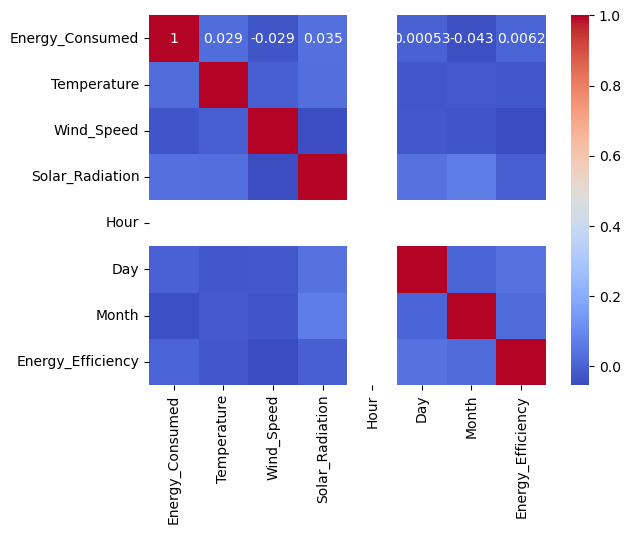

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Correlation heatmap
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


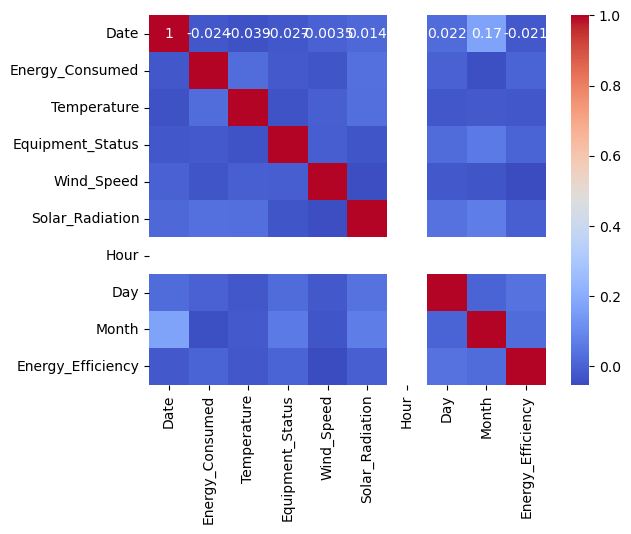

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numeric (if relevant)
# You can use one-hot encoding or label encoding
data['Equipment_Status'] = data['Equipment_Status'].astype('category').cat.codes

# Correlation heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

Step 2: Using Scikit-Learn for Feature Importance

        Example: Feature Selection Using Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = data[['Temperature', 'Wind_Speed', 'Solar_Radiation', 'Day']] # input variables
y = data['Energy_Consumed'] # Target Variable

# Fit Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})

print(feature_importance.sort_values(by='Importance', ascending=False))

           Feature  Importance
2  Solar_Radiation    0.334076
0      Temperature    0.332971
1       Wind_Speed    0.332953
3             Hour    0.000000


6. Hands-On Exercise

    Task for Participants:

        1. Preprocessing:

        • Identify and handle missing values in the dataset.
        • Perform data imputation for missing values.

        2. Feature Engineering:
        • Create time-based features like Hour and Day.
        • Design a custom feature (e.g., Energy_Efficiency).

        3. Feature Selection:
        • Plot a correlation matrix to identify strongly correlated features.
        • Use RandomForestRegressor to rank feature importance.

7. Python Libraries Used
    
        pandas: For data manipulation and cleaning.
    
        numpy: For numerical operations.
    
        matplotlib and seaborn: For data visualization.
    
        scikit-learn: For machine learning and feature selection.


Expected Outcomes

        1. Participants will understand how to preprocess data for AI/ML models in the Power/Energy sector.
    
        2. They will gain hands-on experience in handling missing data, feature engineering, and selection.

1. Supervised Learning

    Supervised learning involves training a model on labeled data, where the target output is already known.

    Use Case in Energy Sector:

    Energy Load Forecasting

    Predict future energy demand based on historical consumption data.

    Python Example: Predicting Energy Consumption


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("Energy_data.csv")  # Example dataset

print(data.columns)


Index(['Date', 'Energy_Consumed', 'Temperature', 'Equipment_Status',
       'Wind_Speed', 'Solar_Radiation'],
      dtype='object')


In [24]:
# Extract hour, day, and month from date

data['Date'] = pd.to_datetime(data['Date'])
data['Hour'] = data['Date'].dt.hour
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month

In [27]:
# Create an energy efficiency ratio
data['Energy_Efficiency'] = data['Energy_Consumed'] / (data['Temperature'] + 1)

2.	Combining Features:

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1000 non-null   datetime64[ns]
 1   Energy_Consumed    1000 non-null   float64       
 2   Temperature        1000 non-null   float64       
 3   Equipment_Status   1000 non-null   object        
 4   Wind_Speed         1000 non-null   float64       
 5   Solar_Radiation    1000 non-null   float64       
 6   Hour               1000 non-null   int32         
 7   Day                1000 non-null   int32         
 8   Month              1000 non-null   int32         
 9   Energy_Efficiency  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(3), object(1)
memory usage: 66.5+ KB


In [40]:
X = data[['Temperature', 'Day','Month','Hour','Wind_Speed']]  # Features

print(X.head())

y = data['Energy_Consumed']  # Target variable

print(y.head())

   Temperature  Day  Month  Hour  Wind_Speed
0    -1.669018    1      1     0   16.817575
1    14.385543    2      1     0   19.917035
2    29.282563    3      1     0    6.261697
3    22.950120    4      1     0   15.621852
4    26.295252    5      1     0   14.293650
0    424.724071
1    770.428584
2    639.196365
3    559.195091
4    293.611184
Name: Energy_Consumed, dtype: float64


In [41]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head(),X_test.head(),y_train.head(),y_test.head())

     Temperature  Day  Month  Hour  Wind_Speed
29     27.301196   30      1     0   15.807054
535    -4.515126   19      6     0    3.241974
695    -6.932246   26     11     0    0.752597
557     8.496281   11      7     0   12.195858
836    -4.235691   16      4     0   23.313872      Temperature  Day  Month  Hour  Wind_Speed
521    32.049621    5      6     0   11.727680
737    -1.241987    7      1     0   18.779428
740    27.239205   10      1     0   22.608994
660    17.026745   22     10     0   12.746350
411    -4.963617   16      2     0    3.252017 29     227.870248
535    766.859438
695    566.372025
557    217.269606
836    748.907541
Name: Energy_Consumed, dtype: float64 521    428.534514
737    689.959664
740    477.607871
660    413.658036
411    770.037180
Name: Energy_Consumed, dtype: float64


In [42]:
# Train a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict on test data
predictions = model.predict(X_test)
print(predictions[:10])

[509.28344295 504.18486745 514.5071184  487.6971024  499.34932709
 481.27733455 485.67265577 483.97798547 504.64421587 504.27399452]


In [44]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 30203.178825306593


Outcome: 
The model predicts energy consumption based on temperature, solar radiation, and wind speed.